<a href="https://colab.research.google.com/github/Kasyap3/Kasyap3/blob/main/2_Layer_NN_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
!wget https://raw.githubusercontent.com/Atcold/pytorch-Deep-Learning/master/res/plot_lib.py
import random

--2022-01-26 05:42:08--  https://raw.githubusercontent.com/Atcold/pytorch-Deep-Learning/master/res/plot_lib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4399 (4.3K) [text/plain]
Saving to: ‘plot_lib.py’

plot_lib.py         100%[===================>]   4.30K  --.-KB/s    in 0s      

2022-01-26 05:42:08 (52.0 MB/s) - ‘plot_lib.py’ saved [4399/4399]



In [ ]:
import random
import torch
from torch import nn, optim
import math
from IPython import display
from plot_lib import plot_data, plot_model, set_default

In [ ]:
set_default()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device: ', device)

device:  cpu


In [ ]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)

In [ ]:
N = 1000  # Number of samples per class
D = 2  # Characteristic dimension of each sample
C = 3  # Category of sample
H = 100  # The number of hidden layer units in neural networks

Shapes:
X: torch.Size([3000, 2])
Y: torch.Size([3000])


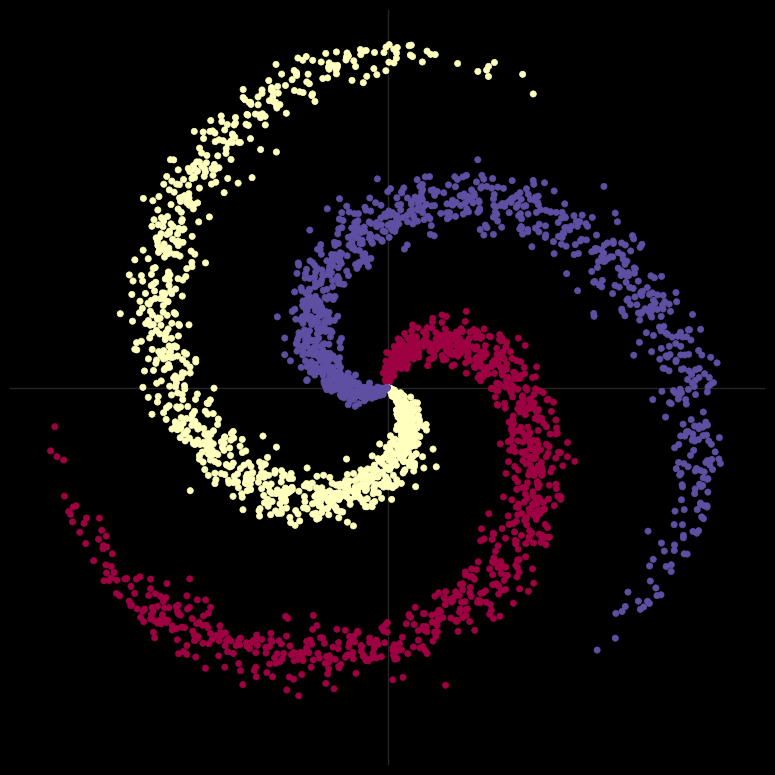

In [ ]:
#Initializes X and Y, where x can be understood as a characteristic matrix and Y as a sample label

X = torch.zeros(N * C, D).to(device)
Y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N) # In [0,1], take 10000 numbers evenly and assign them to t
    # The following code does not need to understand too much, in short, three types of samples are calculated according to the formula (can form a spiral)
    # torch.randn(N) It is to get a group of N random numbers with mean value of 0 and variance of 1, which should be distinguished from rand
    inner_var = torch.linspace( (2*math.pi/C)*c, (2*math.pi/C)*(2+c), N) + torch.randn(N) * 0.2
    
    # The (x,y) coordinates of each sample are stored in X
    # The categories of samples stored in Y are [0, 1, 2]
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((math.sin(inner_var[index]), math.cos(inner_var[index])))
        Y[ix] = c
        index += 1

print("Shapes:")
print("X:", X.size())
print("Y:", Y.size())

# visualise the data
plot_data(X, Y)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


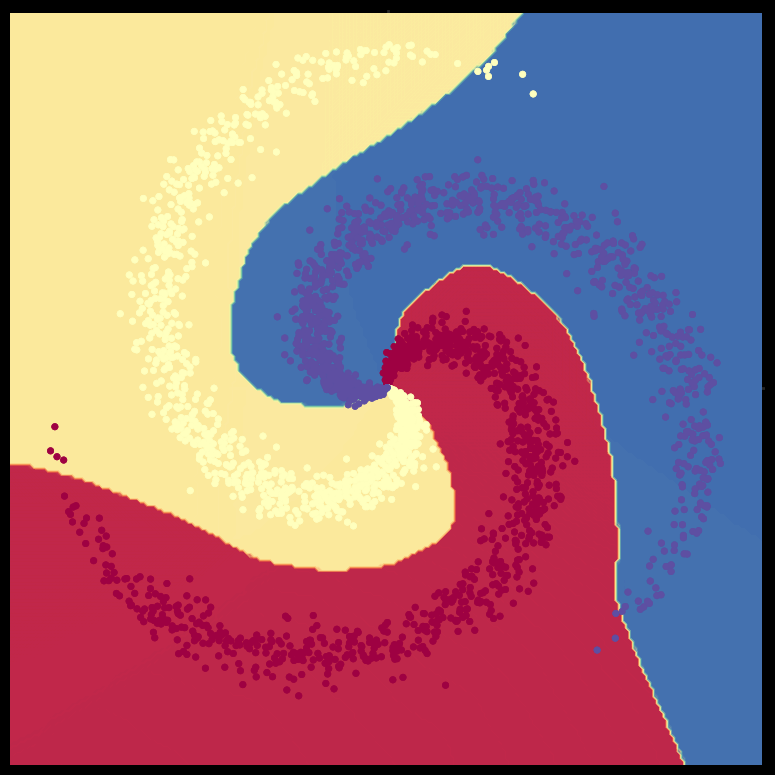

In [ ]:
learning_rate = 1e-3
lambda_l2 = 1e-5

# As you can see, different from the above model, a ReLU activation function is added between the two layers
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

# The following code is exactly the same as before, but I'll tell you more
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# The training model is exactly the same as the previous code
for t in range(1000):
    y_pred = model(X)
    loss = criterion(y_pred, Y)
    score, predicted = torch.max(y_pred, 1)
    acc = ((Y == predicted).sum().float() / len(Y))
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # zero the gradients before running the backward pass.
    optimizer.zero_grad()
    # Backward pass to compute the gradient
    loss.backward()
    # Update params
    optimizer.step()
    print(model)
    plot_model(X,Y,model)
